In [1]:
# Standard library imports
import json
import requests

# Third-party imports for data handling
import pandas as pd
import geopandas as gpd
from pandas.io.json import json_normalize

# Third-party imports for data visualization
import matplotlib
import plotly.express as px
import plotly.graph_objects as go

# Third-party imports for geospatial data
import overpass
import pyproj
from shapely.geometry import Point

In [47]:
#Read and format Shape Files
labota_shp = gpd.read_file("C:/Users/diana/Documents/healthy_citys/healthy_citys/LaBotayToctiuco/CENSOLABOTA/CENSO.shp")
labota_shp = labota_shp.to_crs('epsg:4326') # lat lon format
toctiuco_shp = gpd.read_file("C:/Users/diana/Documents/healthy_citys/healthy_citys/LaBotayToctiuco/CENSOTOCTIUCO/CENSO.shp")
toctiuco_shp = toctiuco_shp.to_crs('epsg:4326')


In [48]:
# Extract the bounding box of the labota_shp
bbox = labota_shp.total_bounds

# Print the bounding box coordinates
print(bbox)

array([-78.47128883,  -0.12192121, -78.44784892,  -0.1093269 ])

<AxesSubplot: >

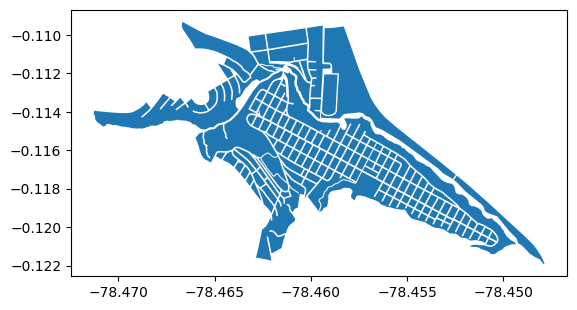

In [49]:
#Plots
labota_shp.plot()

<AxesSubplot: >

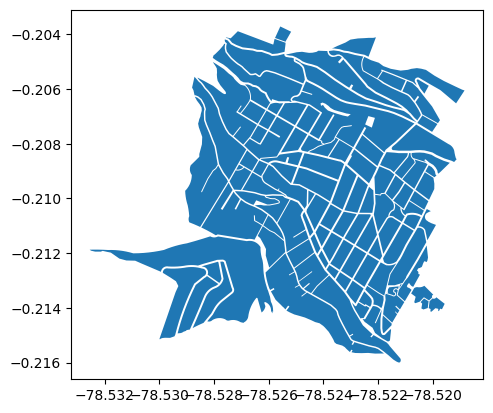

In [50]:
toctiuco_shp.plot()

In [51]:
# Get bounding box of shapefile
bbox = labota_shp.total_bounds

# Define query for points of interest
query = 'node["amenity"]({}, {}, {}, {});out;'.format(*bbox)

# Execute query on OSM API
api = API()
pois = api.get(query)

# Filter POIs that are inside the shapefile
#pois_inside = pois.filter(labota_shp.geometry.contains)

# Print filtered POIs
print(pois)

{"features": [], "type": "FeatureCollection"}


In [52]:
# Get bounding box of shapefile
bbox = toctiuco_shp.total_bounds

# Define query for points of interest
query = 'node["amenity"]({}, {}, {}, {});out;'.format(*bbox)

# Execute query on OSM API
api = overpass.API()
pois = api.get(query)

# Filter POIs that are inside the shapefile
#pois_inside = pois.filter(labota_shp.geometry.contains)

# Print filtered POIs
print(pois)

{"features": [], "type": "FeatureCollection"}


In [53]:
pois = json_normalize(pois['features'])

C:\Users\diana\AppData\Local\Temp\ipykernel_14096\2933067343.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  pois = json_normalize(pois['features'])


In [54]:
pois.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>

In [64]:
url = 'http://overpass-api.de/api/interpreter'  # Overpass API URL

query = f"""
    [out:json];
    area[name='Pichincha'];
    (node ["amenity"](area););
    out;
"""
r = requests.get(url, params={'data': query})

data = r.json()['elements']  # read response as JSON and get the data
df = json_normalize(data)

C:\Users\diana\AppData\Local\Temp\ipykernel_14096\1614225626.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(data)


In [65]:
df.head()

,type,id,lat,lon,tags.amenity,tags.cuisine,tags.name,tags.religion,tags.addr:housename,tags.shop,...,tags.waste,tags.recycling:green_waste,tags.cash_in,tags.natural,tags.bar,tags.parking:orientation,tags.portable,tags.power,tags.traffic_signals,tags.ferry
0,node,264441677,-0.151976,-78.491820,waste_basket,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,265509271,-0.126884,-78.493818,restaurant,pizza,HUT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,267036924,-0.202557,-78.501622,cafe,NaN,Monsterrate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,268300088,-0.229593,-78.484244,place_of_worship,NaN,NaN,christian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,276374681,-0.162062,-78.498341,nightclub,NaN,El Bosque,NaN,El Bosque,mall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.shape

(13861, 215)

In [71]:
# Convert DataFrame to GeoDataFrame
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
df_bota = df[df.within(labota_shp.unary_union)]

In [72]:
df_bota.head(25)

,type,id,lat,lon,tags.amenity,tags.cuisine,tags.name,tags.religion,tags.addr:housename,tags.shop,...,tags.recycling:green_waste,tags.cash_in,tags.natural,tags.bar,tags.parking:orientation,tags.portable,tags.power,tags.traffic_signals,tags.ferry,geometry
4902,node,4703912354,-0.110609,-78.460258,school,NaN,Unidad Educativa LEIBNITZ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.46026 -0.11061)
7396,node,7913558133,-0.115744,-78.461037,place_of_worship,NaN,Iglesia Católica San Francisco de Asís - La Bota,christian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.46104 -0.11574)


In [73]:
df_toc = df[df.within(toctiuco_shp.unary_union)]

In [74]:
df_toc

,type,id,lat,lon,tags.amenity,tags.cuisine,tags.name,tags.religion,tags.addr:housename,tags.shop,...,tags.recycling:green_waste,tags.cash_in,tags.natural,tags.bar,tags.parking:orientation,tags.portable,tags.power,tags.traffic_signals,tags.ferry,geometry
4151,node,4326861019,-0.207486,-78.520630,school,NaN,Juan Montalvo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52063 -0.20749)
5136,node,4874963721,-0.211268,-78.524217,police,NaN,Reten Toctiuco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52422 -0.21127)
5824,node,5483568123,-0.213747,-78.524202,hospital,NaN,Centro de Salud EL PLACER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52420 -0.21375)
6793,node,6775098636,-0.212463,-78.523757,doctors,NaN,Centro de salud Toctiuco,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52376 -0.21246)
7395,node,7909339916,-0.208151,-78.519356,place_of_worship,NaN,Iglesia Católica Sagrado Corazón de Jesús - Mi...,christian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.51936 -0.20815)
7780,node,9004607141,-0.210420,-78.524401,restaurant,pizza,Prueba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52440 -0.21042)
7781,node,9004607154,-0.210148,-78.524368,bank,NaN,Baco Prueba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52437 -0.21015)
9578,node,9719484947,-0.209119,-78.521296,parking_entrance,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52130 -0.20912)
9728,node,9725640330,-0.211913,-78.521105,parking_entrance,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52111 -0.21191)
10327,node,9731422165,-0.209236,-78.521169,parking_entrance,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.52117 -0.20924)
